In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Load the dataset
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

### Change data types for some columns to make them appropriate for analysis.


In [3]:
# change data type for date columns
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

In [4]:
# change data type to category
bike_df = bike_df.astype({'user_type':'category', 'bike_share_for_all_trip':'category'})

In [5]:
# change the Columns from int64 to str
bike_df = bike_df.astype({"start_station_id":'str', "end_station_id":'str', "bike_id":'str'}) 

In [6]:
# extract new column for day
bike_df['start_time_day'] =  bike_df['start_time'].dt.day_name()

In [7]:
#Understand aspects of the dataset
print(bike_df.shape)

print(bike_df.info())

print(bike_df.dtypes)

print(bike_df.head())

(183412, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  use

In [8]:
# finding all the missing values within the bike_df dataset
bike_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_time_day                0
dtype: int64

In [9]:
# show number of duplicated values
bike_df.duplicated().sum()

0

As per the above results, some of the variables have missing values:end_station_id,end_station_name,memmber_birth_year,member_gender

### What is the structure of the dataset ?

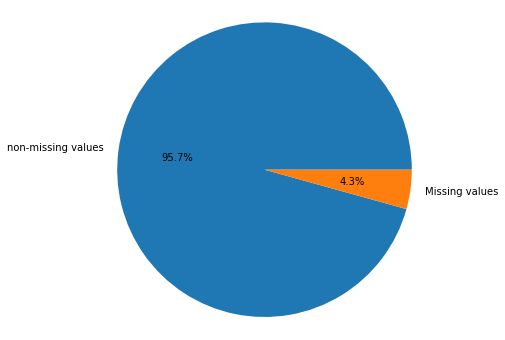

In [10]:
plt.figure(figsize = (8,6))
labels= ['non-missing values','Missing values']

colors=['blue', 'grey']

sizes= [len(bike_df.member_birth_year), bike_df.member_birth_year.isna().sum()]

plt.pie(sizes,labels=labels, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

* The Features included in the Data are as follows :

* Member's Year of Birth, Member's Gender, User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual), Trip Duration(in seconds), Bike ID, Start Time and Date, End Time and Date, Start Station ID,  End Station ID, Start Station Name, End Station Name, End Station Latitude, End Station Longitude, Start Station Latitude, Start Station Longitude.

* As observed above, the total number of missing values is about 4.3% of the whole dataset,this means that removing them from the dataset cannot impact the data analysis findings as it is less than 5% of the entire dataset.

### What is/are the main feature(s) of interest in your dataset?


I am interested in the relaationship between bike riding and gender, age and day of the week and user type either the user is a subscriber or not.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?




* duration_sec
* user_type
* member_gender
* member_birth_year
* bike_share_for_all_trip
* start_time
* end_time

## Cleaning the dataset

### Removing all missing values

In [11]:
# dropping missing values from the dataset
bike_df = bike_df.dropna()

#printing out the resultant dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       


## Univariate Exploration

In this section, investigate distributions of individual variables.

### Distribution of Trip Duration

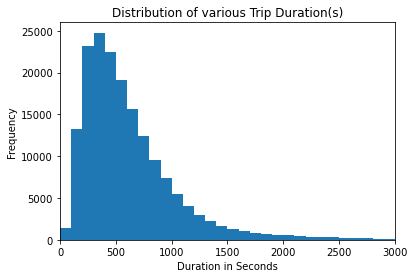

In [12]:
# Here we plot the distribution of trip durations.

binedges = np.arange(0, bike_df['duration_sec'].max() + 100 , 100)
plt.hist(data = bike_df , x = 'duration_sec' , bins = binedges)
plt.xlim(0,3000)
plt.title('Distribution of various Trip Duration(s)')
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency');

#### Observation

We can visualize that the the above plot is right-screwed, with a long tail on the right. The next step is to apply a logarithmic transformation to x-axis.

Visualizing the above plot was extremely difficult, to change this, the bin-width was increased to 100 so as to visualize the plot. Also, it seems unreasonable to measure the trip duration in seconds, hence we are changing "duration_sec" to "duration_min" before we make any logarithmic transformation.

In [13]:
# create new column from the duration_sec column
bike_df['duration_min'] = bike_df['duration_sec'] / 60
bike_df.drop(columns='duration_sec',axis=1,inplace=True)
bike_df['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

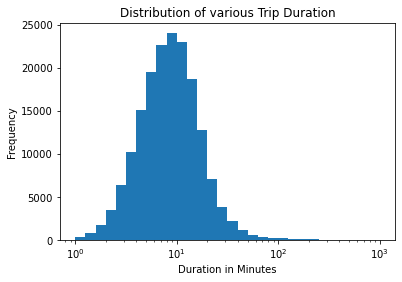

In [14]:
binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = bike_df , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of various Trip Duration')
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');

#### Observation

We can now easily interpret the plot, most of trips seem to be short trips which the duration for trips is around 10 minutes.

### Distribution of Birth Year

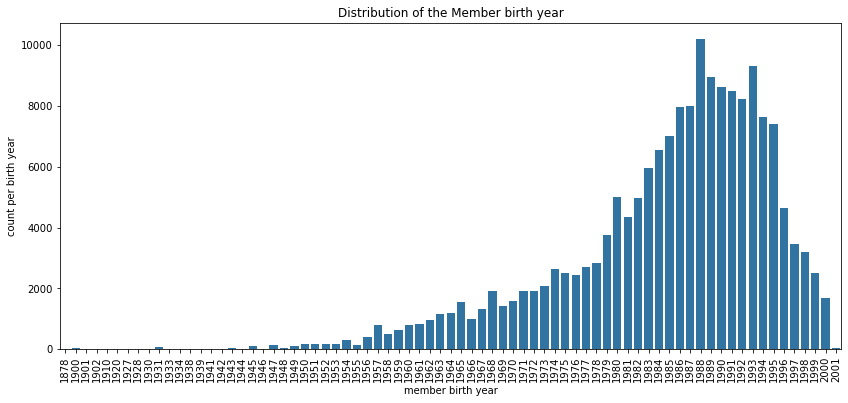

In [15]:
# import the seaborn package to be used
import seaborn as sns
base_color = sns.color_palette()[0]
bike_df['member_birth_year'] = bike_df.member_birth_year.astype(int)
bike_df.member_birth_year.value_counts()

# creating a plot to view the distribution of the birth year for the bike_sharing users
plt.figure(figsize = (14,6))
sns.countplot(data = bike_df, x = 'member_birth_year', color = base_color)
plt.xticks(rotation = 90)
plt.title('Distribution of the Member birth year')
plt.xlabel('member birth year');
plt.ylabel('count per birth year');

#### Observation

The above plot shows that most of bike sharing users were born between 1960s and 2000. this means that younger people use bike sharing sharing scheme more than elder people.

### Distribution of Bike User Type

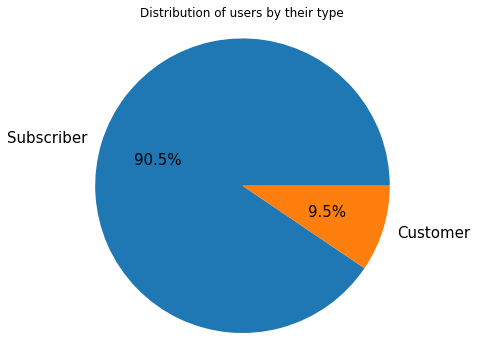

In [16]:
plt.figure(figsize = (8,6))
plt.pie(bike_df.user_type.value_counts(), labels = bike_df.user_type.value_counts().index,autopct='%1.1f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.title( 'Distribution of users by their type');

#### Observation


It is obvious that most of the users in the bike sharing scheme are those who have subscribed while a minimal number of users are those who aren't.

### Distribution bike users who used bike sharing for all trip

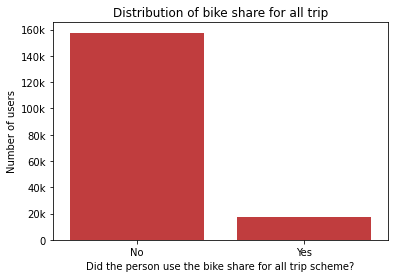

In [17]:
# creating the plot
sns.countplot(data = bike_df, x = 'bike_share_for_all_trip', color = sns.color_palette()[3])
# annotating the plot
plt.yticks([0,20e3,40e3,60e3,80e3,100e3, 120e3,140e3,160e3],['0','20k','40k','60k','80k','100k', '120k','140k','160k'])

# labelling the created chart by using a function
plt.ylabel('Number of users') 
plt.xlabel ('Did the person use the bike share for all trip scheme?')
plt.title ('Distribution of bike share for all trip');

#### Observation


As per the above plot, the number of users who used bike sharing for all trip scheme are very few compared to those who didn't.

### Distribution of bike sharing

In [18]:
# show the number of values for the column
bike_df['start_station_name'].value_counts().head(10)

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

In [19]:
def plotCount(var,title):
    plt.figure(figsize=[8,5])
    sns.countplot(data=bike_df , y =var,order=bike_df[var].value_counts().head(10).index,color=sns.color_palette()[6])
    plt.title(title);

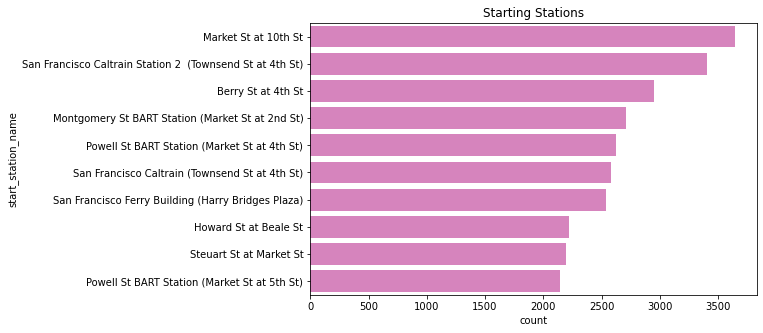

In [20]:
plotCount('start_station_name','Starting Stations')

#### Observation

We can see that Market St at 10th St seems that most of trips started from it also San Francisco Caltrain Station 2, Berry St at 4th St came after it.

In [21]:
bike_df['end_station_name'].value_counts().head(10)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Powell St BART Station (Market St at 4th St)                 2854
Berry St at 4th St                                           2782
The Embarcadero at Sansome St                                2341
Steuart St at Market St                                      2264
Powell St BART Station (Market St at 5th St)                 2153
Name: end_station_name, dtype: int64

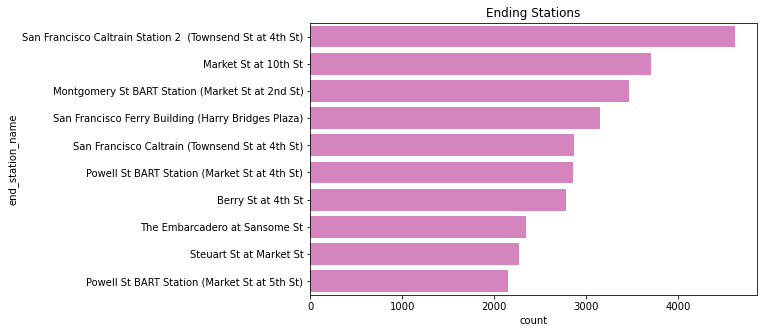

In [22]:
plotCount('end_station_name','Ending Stations')

#### Observation

We can see that San Francisco Caltrain Station 2 is the most ending station for trips, followed by Market St at 10th St.

### Distribution of user type

In [23]:
bike_df['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

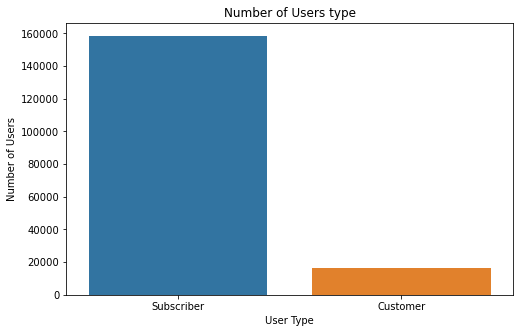

In [24]:
plt.figure(figsize=[8,5])
sns.countplot(data=bike_df,x='user_type',order=bike_df['user_type'].value_counts().index)
plt.title('Number of Users type')
plt.xlabel('User Type')
plt.ylabel('Number of Users');

#### Observation

As per the plot aboove we can see that the number of sunscribers is higher than the number of customers who are not subscribers.

### Which Day is most favorable for riders?

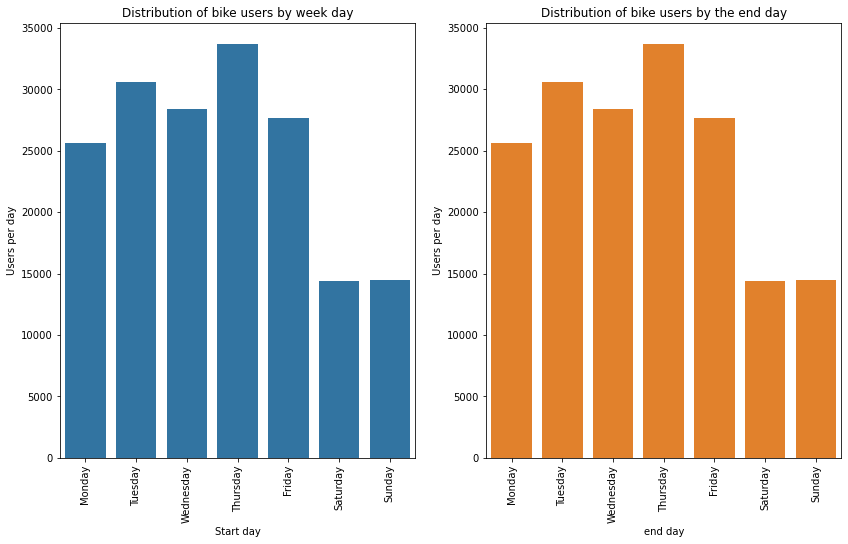

In [25]:
## Creating a new column for week days
from datetime import datetime as dt
bike_df['start_day'] = bike_df.start_time.dt.day_name()
bike_df['end_day'] = bike_df.end_time.dt.day_name()


### Creating the distribution of the bike users by weekday
plt.figure(figsize = (14,8))
# order to be used
start_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
end_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# plot 1
plt.subplot(1,2,1)
sns.countplot(data = bike_df, x = 'start_day', color = sns.color_palette()[0], order=start_order)
plt.title('Distribution of bike users by week day')
plt.xlabel ('Start day')
plt.ylabel ('Users per day')
plt.xticks(rotation = 90);

# plot 2
plt.subplot(1,2,2)
sns.countplot(data = bike_df, x = 'end_day', color = sns.color_palette()[1], order = end_order)
plt.title('Distribution of bike users by the end day')
plt.xlabel('end day')
plt.ylabel('Users per day')
plt.xticks(rotation =90);

#### Observation

As per the above two subplots, Thurdays were the weekdays on which most persons use bikes. followed by Tuesday.

### Distribution of Gender among bike users

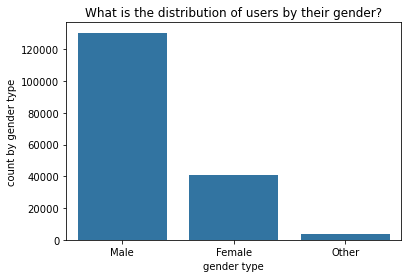

In [26]:
# counting users of bike sharing by their gender type
gender = bike_df.member_gender.value_counts()

# retrieving the index per gender type
gender['gender_ind'] = gender.index

# reseting gender index
gender = gender.reset_index(level = 0)

# renaming the gender index
gender.rename({'index':'gender_ind'}, axis = 1, inplace = True)
gender = gender[gender.index<3]

# changing the count of member_gender
gender['member_gender'] = gender.member_gender.astype(int)

## Creating the plot of the distribution of the users gender type
sns.barplot(data = gender, x = 'gender_ind', y = 'member_gender', color = base_color)
plt.xlabel('gender type')
plt.ylabel('count by gender type')
plt.title ('What is the distribution of users by their gender?');

#### Observation

As observed in the above plot, most of the bike sharing users are male gender followed by Female gender type while a small group of users reported to have other gender types.

### Distribution by Age Category

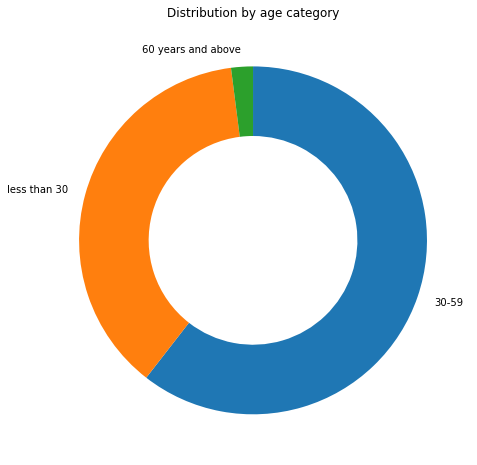

In [27]:
# creating a new variable named age
bike_df['age'] = 2019-bike_df.member_birth_year

# creating a new variable named age_category

bike_df.loc[bike_df['age']<30, 'age_category'] = 'less than 30'
bike_df.loc[(bike_df['age']>=30)&(bike_df['age']<60), 'age_category'] = '30-59'
bike_df.loc[bike_df['age']>60, 'age_category'] = '60 years and above'

# Creating the plot to Visualize the distribution of bike sharing users by their age category
plt.figure(figsize = (10,8))
sorted_counts = bike_df.age_category.value_counts()
plt.pie(sorted_counts,labels = sorted_counts.index, startangle=90, counterclock=False,wedgeprops = {'width' : 0.4})
plt.title('Distribution by age category');

#### Observation

The above donutchart shows that most of the bike sharing users' age falls in 30-59 age category followed by those who are less than 30 years while 60 years and above age category has the least number of users.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Weekdays usually busier than weekends, maybe because people are not going to work or schools. Thursdays and Tuesdays usually the busiest days of the week. 

On user types, there were more male riders than female, and most members were subscribers compared to non-subscribers(customers). Most users did not want to share bikes for all their trips. Most users are aged 20 to 40 years.

Duration taken by users were short, most lasted between 5 to 10 minutes, though there were some very long outliers like 24hrs.

The difference between people in the starting station and the ending station is not that much which means that the customers are almost equal in all stations.

Little transformation was needed for the dataset, like including new columns(time in minutes)and removing some missing values.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I used a feature which wasn't really necessary to compliment my analysis such as knowing the most famous starting station and ending station. But as I was interested I was thinking that it could be useful to another person who will use my analysis.

## Bivariate Exploration

### Correlation between days of riding and gender of riders

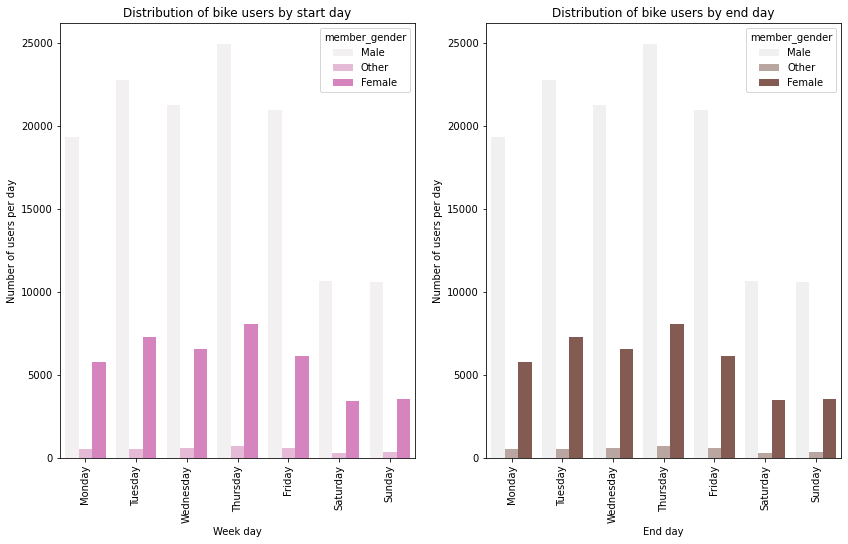

In [28]:
## Creating two subplots for comparison 
plt.figure(figsize = (14,8))


# plot 1 - start time (day)
plt.subplot(1,2,1)
sns.countplot(data = bike_df, x = 'start_day', color = sns.color_palette()[6], order=start_order, hue = 'member_gender')
plt.title ('Distribution of bike users by start day')
plt.xlabel('Week day')
plt.ylabel('Number of users per day')
plt.xticks(rotation = 90);

# plot 2 - end time (day)
plt.subplot(1,2,2)

sns.countplot(data = bike_df, x = 'end_day', color = sns.color_palette()[5], order = end_order, hue = 'member_gender')
plt.title('Distribution of bike users by end day')
plt.xlabel('End day')
plt.ylabel('Number of users per day')
plt.xticks(rotation = 90);

#### Observation

The distribution among users by their gender types per each day looks similar for both the two subplots. It is observed that most of bike users were active on Thurdays while weekend days were observed to have least number of users across the three gender groups. It is also observed that the number of Male is higher than Female.

### Correlation between Age and bike users type

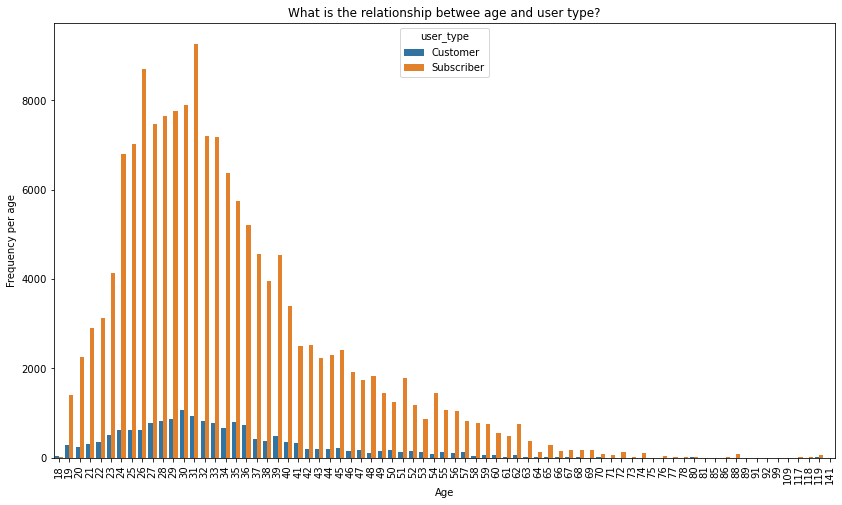

In [29]:

# color to be used
base_color = sns.color_palette()[0]

# creating the plot
plt.figure(figsize = (14,8))
sns.countplot(data = bike_df, x = 'age', hue = 'user_type')
plt.xticks(rotation = 90)
plt.title('What is the relationship betwee age and user type?')
plt.xlabel('Age')
plt.ylabel('Frequency per age');

#### Observation

* Most of bike sharing users fall under the ages between 19 and 62 years old.
* Users who have subscribed are the dominate the age range between 19 and 70 years olds.
* Among subscribers, the highest number of users were recorded among those with 31 years old.
* Among Customers (non-subscribers), the highest number of users was recorded amonth the users with 30 years old.

### Correlation between users' age and duration of riding

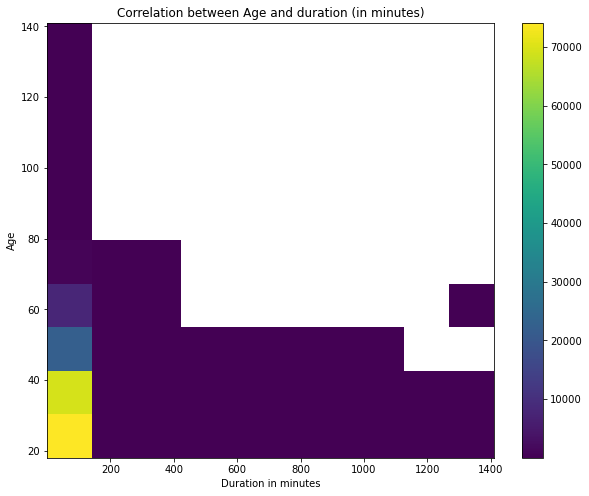

In [54]:
plt.figure(figsize = (10,8))
plt.hist2d(data = bike_df, x = 'duration_min', y = 'age', cmin = 0.5)
plt.colorbar()
plt.xlabel('Duration in minutes')
plt.ylabel('Age')
plt.title("Correlation between Age and duration (in minutes)");

#### Observation

Bike users aged between 20 and 40 years old use above 60,000 seconds while riding while users aged between 40 and 60 years old use between 20,000 and 30,000 seconds while riding. The right side of the graph is in minutes.

### Correlation between age and bike user type

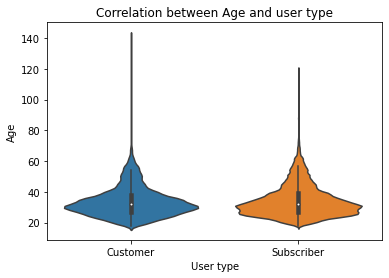

In [39]:
sns.violinplot(data = bike_df, x = 'user_type', y= 'age')
plt.title('Correlation between Age and user type')
plt.xlabel('User type')
plt.ylabel('Age');

#### Observation

* Most of bike sharing users (both Customers and Subscribers) were aged between 20 and 40 years old.
* Bike sharing users who had not subscribed are slightly older than those who had subscribed.

### Relationship between age category and gender of bike users

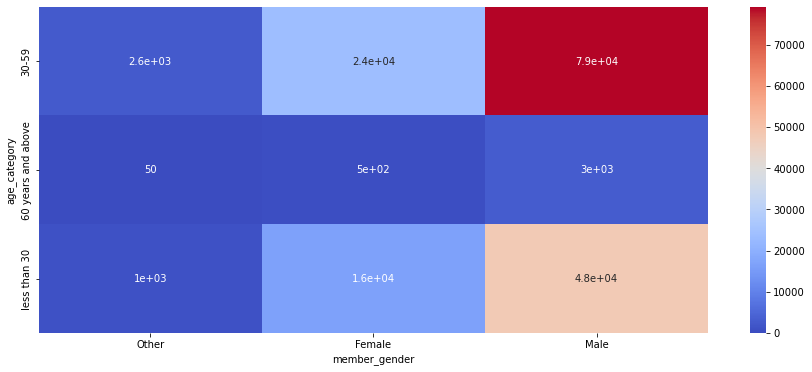

In [40]:
# Types of gender categories
gender_classes = ['Female','Male','Other']

# Returns the types for sedan_classes with the categories and orderedness
# Reference - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
gender_class = pd.api.types.CategoricalDtype(ordered=True, categories=gender_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
bike_df['member_gender'] = bike_df['member_gender'].astype(gender_class);

# finding the group sizes
age_gend_counts = bike_df.groupby(['age_category','member_gender']).size()

# reseting index
index_reset = age_gend_counts.reset_index(name = 'count')

#pivoting the subset to be plotted
final_counts = index_reset.pivot(index = 'age_category', columns= 'member_gender',values= 'count') 

# Creating a heatmap comparing Age category and Member gender
plt.figure(figsize = (15,6))
sns.heatmap(final_counts[['Other','Female','Male']],vmin=-1, annot=True, cmap = 'coolwarm');

#### Observation

* The above heatmap shows that Male gender users between 30 and 59 age category were riding for the longest period (above 70k seconds) compared to other categories. this is followed by male gender users with less than 30 years old.;
* The same above scenario is applied to Female gender bike users;

This confirms the assumption that younger age bike users were riding longer than older bike users. But this is different when it comes to the comparison of users aged less than 30 years old compared to those aged between 30 to 59 years old.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It is observed that most of bike users were active on Thurdays while weekend days were observed to have least number of users across the three gender groups. It is also observed that the number of Male is higher than Female.

Most of bike sharing users fall under the ages between 19 and 62 years old. Users who have subscribed are the dominate the age range between 19 and 70 years olds. Among subscribers, the highest number of users were recorded among those with 31 years old. Among Customers (non-subscribers), the highest number of users was recorded amonth the users with 30 years old.

It is also observed that younger riders use more time riding than old people. Also male have longer duration than female riders.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I did not focus on other feautures out of my interest for now but next time.

## Multivariate Exploration

Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.

### Relationship between days of the week, hours and user type on Bike trips.

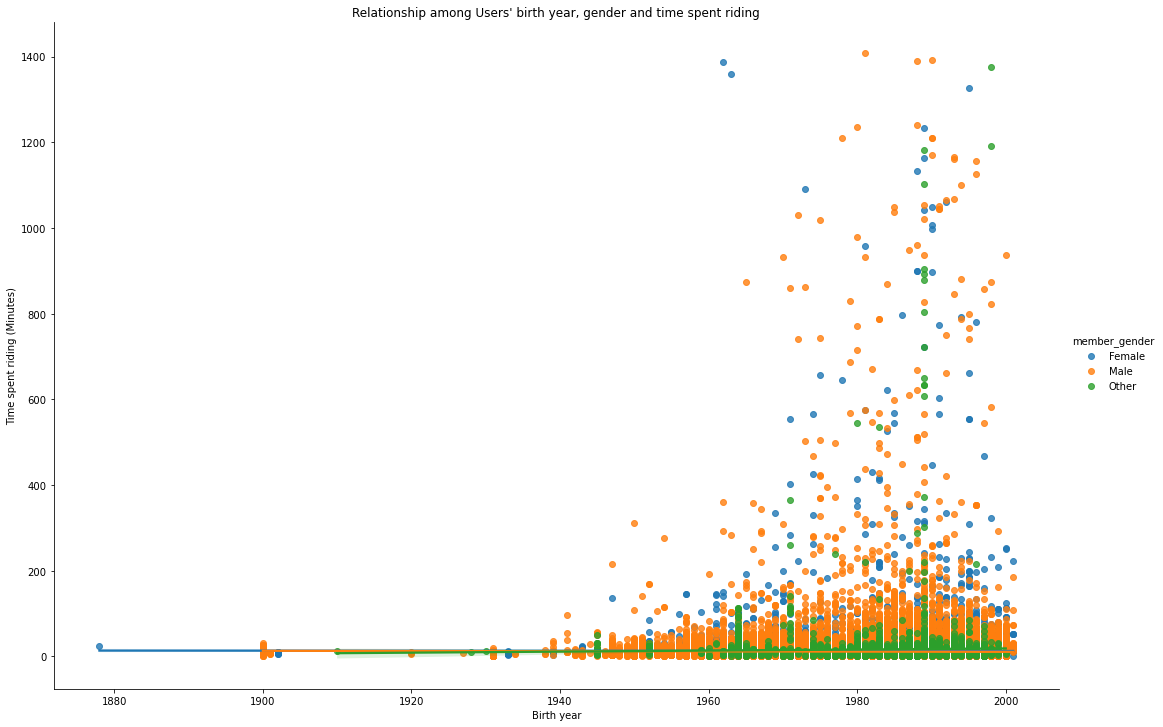

In [44]:
sns.lmplot(data = bike_df, y = 'duration_min',x = 'member_birth_year', hue = 'member_gender', height = 10, aspect = 1.5)
plt.title ('Relationship among Users\' birth year, gender and time spent riding')
plt.xlabel('Birth year')
plt.ylabel('Time spent riding (Minutes)');

#### Observation

* People falling under Male and Female gender groups who were between 1970s and 2000s are those who spent more time riding.

The above plot confirms the hypothesis that younger age bike users tend to use bike for longer period compared to older persons/bike users.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

On this part I also confirmed that the younger users user longer duration than older ones, also that customers who are not subscribers are the ones to use longer duration that subscribers.

### Were there any interesting or surprising interactions between features?

No, the analysis and the visualisation were self explanatory to me but I would advice you to look deep on the last visualistion to make sure you understand the relationship.

## Conclusion and Recommendation

Weekdays usually busier than weekends, maybe because people don't have work or schools. Thursdays and Tuesdays usually the busiest days of the week.
On user types, there were more male riders than female, and most members were subscribers compared to non-subscribers(customers). Most users did not want to share bikes for all their trips. Most users are aged 20 to 40 years.
Duration taken by users were short, most lasted between 5 to 10 minutes, though there were some very long outliers like 24hrs.
The Other gender recorded longest duration compared to female and male while males recorded the least duration. Bike usage is higher during the week than during weekends. More males use bikes during the week than any females and other gender. Subscribers record higher bike usage across the week than customers. Thursdays and Tuesdays are the busiest days of the week. Other gender seem to have much older users that females and males. Females tends to be the youngest users. Average subscriber age is slightly higher than customer age. Other gender recorded highest duration usage compared to females and males across the week.
The shorter duration usage for subscribers may show that they are probably using their bikes to go to work or they are just used to riding and not as excited as customers. The subscribers also seems to be open to sharing, perhaps to reduce cost.